In [25]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
df = pd.DataFrame({"A": [10,20,30,40,50], "B": [20, 30, 10, 40, 50], "C": [32, 234, 23, 23, 42523]})
model = sm.OLS(df['A'].values, sm.add_constant(df[['B', 'C']])).fit()
# model = sm.OLS(formula="A ~ B + C", data=df).fit()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
model.params

const    14.952480
B         0.401182
C         0.000352
dtype: float64

In [3]:
model.summary()

/Users/maleah/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     1.375
Date:                Sun, 09 Dec 2018   Prob (F-statistic):              0.421
Time:                        20:51:25   Log-Likelihood:                -18.178
No. Observations:                   5   AIC:                             42.36
Df Residuals:                       2   BIC:                             41.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9525     17.764      0.842      0.489     -61.481      91.386
B              0.4012      0.650      0.617      0.600      -2.394       3.197
C              0.0004      0.001      0.650      0.583      -0.002       0.003
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.061
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.498
Skew:                          -0.123   Prob(JB):                        0.780
Kurtosis:                       1.474   Cond. No.                     5.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
socio_data = pd.read_stata('gsswide.dta')

In [5]:
socio_data.dtypes

id             int16
papres16        int8
paeduc          int8
maeduc          int8
educ            int8
year            int8
black           int8
male            int8
parfor          int8
hsgrad          int8
colgrad         int8
edcat       category
dtype: object

In [6]:
socio_data.head()

,id,papres16,paeduc,maeduc,educ,year,black,male,parfor,hsgrad,colgrad,edcat
0,1,50,16,12,16,86,0,0,0,1,1,ColGrad
1,2,42,16,16,16,86,0,0,0,1,1,ColGrad
2,3,47,12,12,18,86,0,1,0,1,1,GradSch
3,4,78,19,16,17,86,0,0,0,1,1,GradSch
4,5,41,16,12,18,86,0,1,0,1,1,GradSch


In [7]:
y = socio_data['educ'].values
# X = sm.add_constant() #, 'black', 'male']])#[[x_paeduc, x_maeduc, x_black, x_male ]]
X = socio_data[['papres16','paeduc', 'maeduc']]

In [8]:
from sklearn.linear_model import LinearRegression



In [9]:
lr = LinearRegression().fit(X,y)

In [82]:
lr.coef_
np.mean((lr.predict(X)-y)**2)

6.656961746330154

In [13]:
model = sm.OLS(y, X)
result = model.fit()

In [14]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                    7070.476
Model:                            OLS   Adj. R-squared:               7075.138
Method:                 Least Squares   F-statistic:                    -1517.
Date:                Sun, 09 Dec 2018   Prob (F-statistic):               1.00
Time:                        20:51:39   Log-Likelihood:                -11890.
No. Observations:                4552   AIC:                         2.379e+04
Df Residuals:                    4549   BIC:                         2.380e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
papres16       0.1240      0.003     36.000      0.000       0.117       0.131
paeduc         0.1190      0.017      7.126      0.000       0.086       0.152
maeduc         0.6062      0.017     36.465      0.000       0.574       0.639
==============================================================================
Omnibus:                      130.852   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.854
Skew:                           0.358   Prob(JB):                     3.20e-35
Kurtosis:                       3.570   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
result.params

papres16    0.124029
paeduc      0.119016
maeduc      0.606192
dtype: float64

## Optimizer example

In [16]:
from pyautodiff.optimizer import Optimizer

In [17]:
import numpy as np

In [55]:
opt = Optimizer(loss = 'mse', optimizer = 'sgd',lr=.00001)

In [294]:
y = np.array(socio_data['educ'].values,dtype=np.float)
x = np.array(socio_data[['papres16','paeduc', 'maeduc']],dtype=np.float)#, 'black', 'male']]#[[x_paeduc, x_maeduc, x_black, x_male ]]

def data_fix(x,y):
    #standardizing the x's
    for i in range(x.shape[1]):
        x[:,i] = (x[:,i]-np.mean(x[:,i]))/np.var(x[:,i])
    #centering the y's
    y = y-y.mean()
    return x,y

a,b = data_fix(x,y)


lr = LinearRegression().fit(a,b)
lr.coef_
print("SKLearn optimizer:", lr.predict(a))

opt = Optimizer(loss = 'mse', optimizer = 'sgd',lr=.005)
bad_opt = Optimizer(loss='mse',optimizer='sgd',lr=.005)
bad_opt = Optimizer(loss='mse',optimizer='sgd',lr=.1)

opt.fit(a,b, iters=2000)
bad_opt.fit(a,b, iters=2000)

# bad_opt.fit(x,y, iters=2000)
print("Our optimizer:", opt.predict(a))

SKLearn optimizer: [ 1.62985206  2.49592569  0.84801113 ..., -0.45721484 -0.37594905
 -3.47930206]
Our optimizer: [ 1.35230778  2.49053965  0.74814835 ..., -0.21534396 -0.16790957
 -3.29103948]


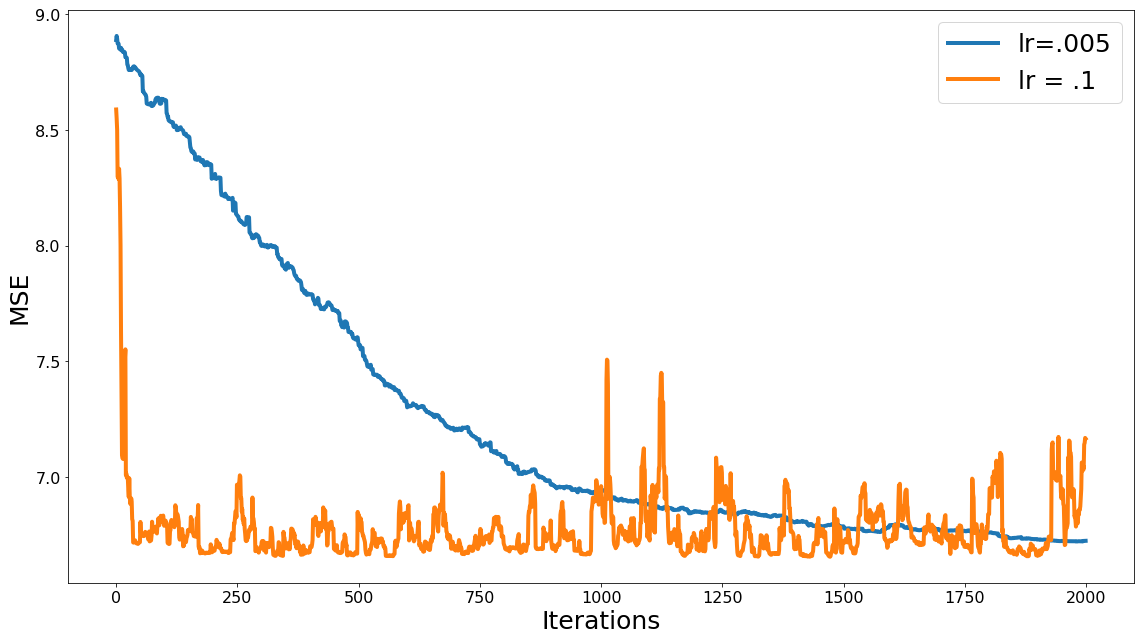

In [295]:
lw = 4
fs=25
plt.figure(figsize=(16,9))
# fig, ax = plt.subplots(2,1)
plt.plot(opt.loss_list,lw=lw,label='lr=.005')
plt.plot(bad_opt.loss_list,lw=lw,label='lr = .1')
# plt.ylim([6.5,10])
#plt.plot(opt_sk.loss_list,lw=lw,label='fake data')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel("Iterations", fontsize = fs)
plt.ylabel("MSE",fontsize=fs)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('standardize_compare.png')

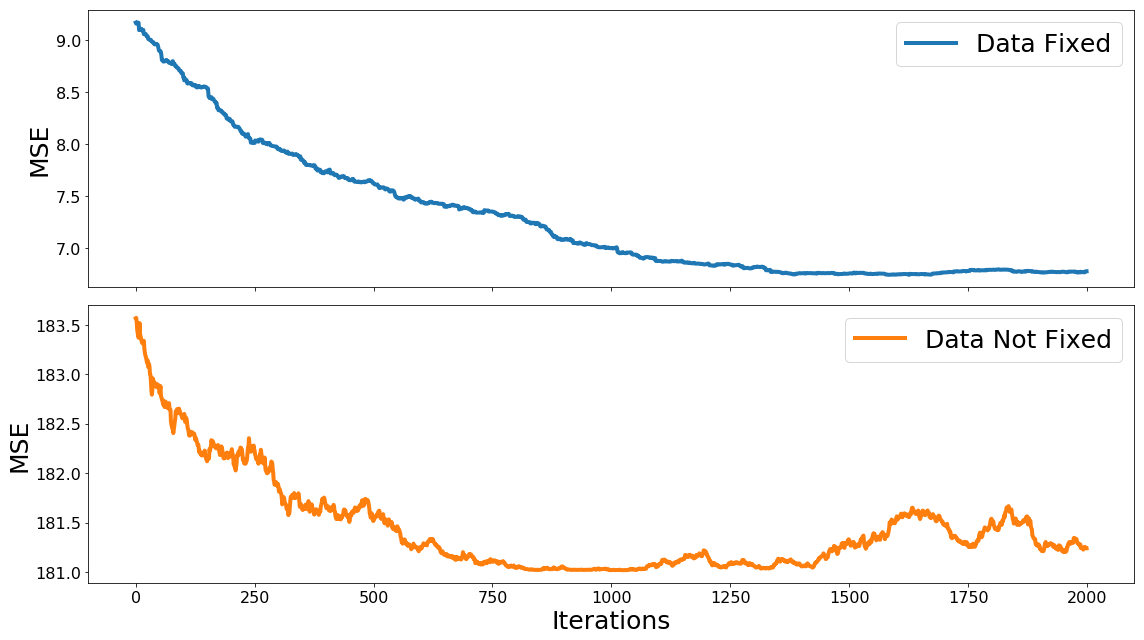

In [293]:
lw = 4
fs=25
fig, ax = plt.subplots(2,1,sharex=True,figsize=(16,9))
ax[0].plot(opt.loss_list,lw=lw,label='Data Fixed')
ax[0].legend(fontsize=fs)
ax[1].plot(bad_opt.loss_list,color='tab:orange',lw=lw,label='Data Not Fixed')
ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_ylabel('MSE',fontsize=fs)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel("Iterations", fontsize = fs)
plt.ylabel("MSE",fontsize=fs)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('standardize_compare.png')

In [200]:
pwd

'/Users/maleah/cs207/cs207-FinalProject'

In [68]:
opt.loss_list

[array([ 312.59944328,    1.63550527,  151.72671035]),
 array([ 343.54545237,   29.57566979,  425.48490319]),
 array([ 45.94306716,  49.50200704,   3.50262016]),
 array([ 82.51429416,  85.59003774,  16.70562045]),
 array([  0.16675486,   1.09287067,  75.26452564]),
 array([   0.82613918,    4.50320329,  261.18665213]),
 array([  6.45737110e-01,   5.85275192e+01,   6.89070341e+02]),
 array([ 42.11493348,  12.10835687,  16.16218104]),
 array([   7.64656887,   25.41440929,  544.80670655]),
 array([  59.64656155,    3.91627006,  292.87670934]),
 array([ 108.9268514 ,   32.01971845,    1.69874176]),
 array([  1.45850621e+02,   6.69347945e-02,   2.88823989e+02]),
 array([ 129.5607289 ,   18.72277157,   28.72119711]),
 array([  74.48305615,   21.66780764,  621.77148481]),
 array([ 256.68009015,  152.16196405,   51.69037882]),
 array([ 42.64760336,   0.22862047,  65.80093601]),
 array([ 89.1737754 ,   4.61778859,  63.50048879]),
 array([  74.04618938,    5.45969827,  297.48198835]),
 array([ 1

In [155]:
from sklearn.datasets import make_regression

In [156]:
X_sk,y_sk,coef_sk = make_regression(n_samples=4500,n_features=3,n_informative=3,coef=True)

# User defined loss function
# def user_mse(y,y_preds):
#     return (y-y_preds)**2


opt_sk = Optimizer(loss='mse',optimizer='sgd')
opt_sk.fit(X_sk,y_sk,iters=1000)

print('Actual Values:')
print('======')
print(coef_sk)

print('Computed Values:')
print('======')
print(opt_sk.coefs)

Actual Values:
[ 6.19569822  1.41680234  0.25210771]
Computed Values:
[ 6.19569822  1.41680234  0.2521077 ]


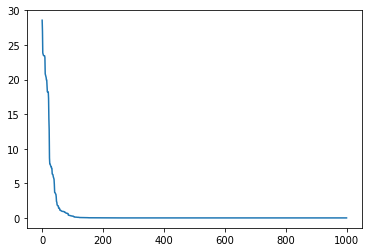

In [157]:
plt.plot(opt_sk.loss_list)

In [98]:
print(X_sk.shape)
print(y_sk.shape)

(4500, 3)
(4500,)


In [99]:
print(X.shape)
print(y.shape)

(4552, 3)
(4552,)


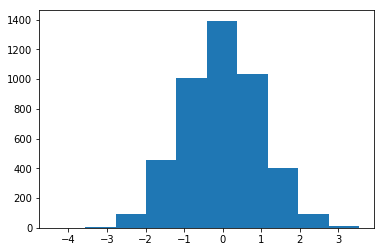

In [100]:
plt.hist(X_sk[:,0])
plt.show()

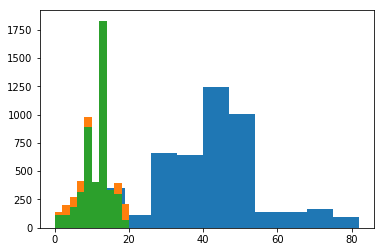

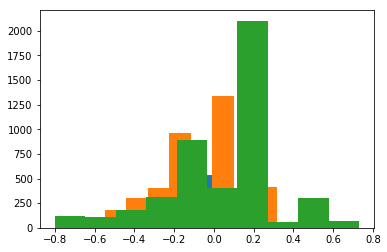

In [106]:
plt.hist(X[:,0])
plt.hist(X[:,1])
plt.hist(X[:,2])

plt.show()

(array([    7.,    36.,   196.,   622.,  1107.,  1305.,   829.,   302.,
           81.,    15.]),
 array([-24.03220328, -19.40232969, -14.77245611, -10.14258253,
         -5.51270895,  -0.88283537,   3.74703822,   8.3769118 ,
         13.00678538,  17.63665896,  22.26653255]),
 <a list of 10 Patch objects>)

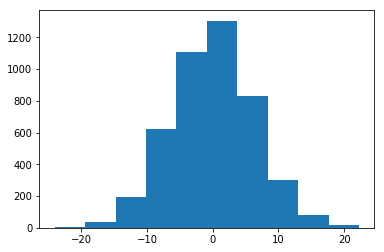

In [158]:
plt.hist(y_sk)

(array([   11.,    20.,    47.,    84.,   286.,   342.,  1834.,   720.,
          813.,   395.]),
 array([ -1.38059211,   0.61940789,   2.61940789,   4.61940789,
          6.61940789,   8.61940789,  10.61940789,  12.61940789,
         14.61940789,  16.61940789,  18.61940789]),
 <a list of 10 Patch objects>)

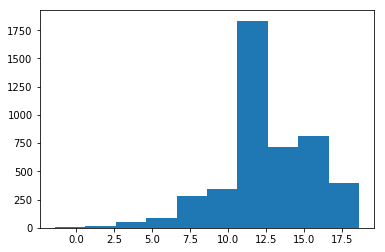

In [159]:
plt.hist(y)